# The Yeast in a Culture
Linear Regression in logistic population growth model

## The data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

In [2]:
time = np.arange(19)

In [3]:
observed = np.array([9.6,
18.3,
29.0,
47.2,
71.1,
119.1,
174.6,
257.3,
350.7,
441.0,
513.3,
559.7,
594.8,
629.4,
640.8,
651.1,
655.9,
659.6,
661.8])

## Ploting the data

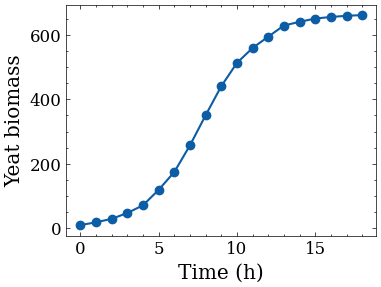

In [4]:
plt.plot(time, observed, marker="o")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.show()

In [5]:
M = 665
P = observed

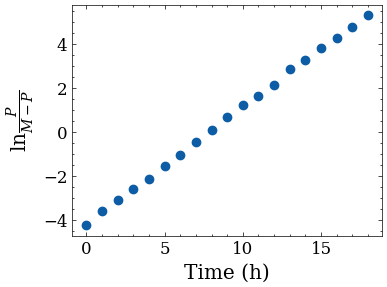

In [6]:
plt.scatter(time, np.log(P/(M-P)), marker="o")
plt.xlabel("Time (h)")
plt.ylabel(r"${\rm{ln}}\frac{P}{M-P}$")
plt.show()

## Linear least squares fit - standard

In [7]:
# first try numpy polyfit
slope, intercept = np.polyfit(time, np.log(P/(M-P)), deg=1)
slope, intercept

(np.float64(0.5306746627219533), np.float64(-4.163572101473056))

In [8]:
# then scipy linear regression
import scipy

In [9]:
scipy.stats.linregress(time, np.log(P/(M-P)))

LinregressResult(slope=np.float64(0.5306746627219531), intercept=np.float64(-4.163572101473055), rvalue=np.float64(0.9998025122201444), pvalue=np.float64(2.2433224210480064e-30), stderr=np.float64(0.0025583109916853066), intercept_stderr=np.float64(0.02695347880051371))

## Linear least squares fit - in house

In [10]:
# single variable linear regression approach
x = time
y = np.log(P/(M-P))
m = len(time)

In [11]:
A = (m * x @ y - (x.reshape(-1, 1) * y.reshape(1, -1)).sum()) / (m * x @ x - (x.reshape(-1, 1) * x.reshape(1, -1)).sum())
A

np.float64(0.5306746627219532)

In [12]:
B = (y - A * x).sum() / m
B

np.float64(-4.163572101473057)

In [13]:
# multi-variable linear regression approach
X = np.array([x, np.ones(m)]).T
X.shape

(19, 2)

In [14]:
np.linalg.inv(X.T @ X) @ (y @ X)

array([ 0.53067466, -4.1635721 ])